In [1]:
import glob

from pathlib import Path
from tqdm import tqdm

import annotation_utils

/home/ltindall/.pyenv/versions/3.10.9/envs/rfml-dev/lib/python3.10/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [2]:
s3_data = {
    "anom_wifi": [
        # "data/gamutrf/gamutrf-nz-anon-wifi/*.sigmf-meta",
        # "data/gamutrf/gamutrf-wifi-and-anom-bladerf/anom*.sigmf-meta"
        
    ],
    "wifi": [
        # "data/gamutrf/gamutrf-nz-nonanon-wifi/*.sigmf-meta",
        # "data/gamutrf/gamutrf-wifi-and-anom-bladerf/wifi*.sigmf-meta",
        # "data/gamutrf/gamutrf-nz-wifi/*.sigmf-meta",
        "data/gamutrf/gamutrf-wifi-and-anom-bladerf/wifi-encoding-1-sendsps-5000000.s16.zst.sigmf-meta"
    ],
}
        

  0%|                                                                                                                                  | 0/1 [00:00<?, ?it/s]


Loaded 
 Data file: data/gamutrf/gamutrf-wifi-and-anom-bladerf/wifi-encoding-1-sendsps-5000000.s16.zst.sigmf-data 
 SigMF-Meta file: data/gamutrf/gamutrf-wifi-and-anom-bladerf/wifi-encoding-1-sendsps-5000000.s16.zst.sigmf-meta

np.max(avg_pwr_db)=-43.70783261358198
np.mean(avg_pwr_db)=-59.49314720611242
median absolute deviation threshold = -59.05682896524394
using threshold = -59.05682896524394


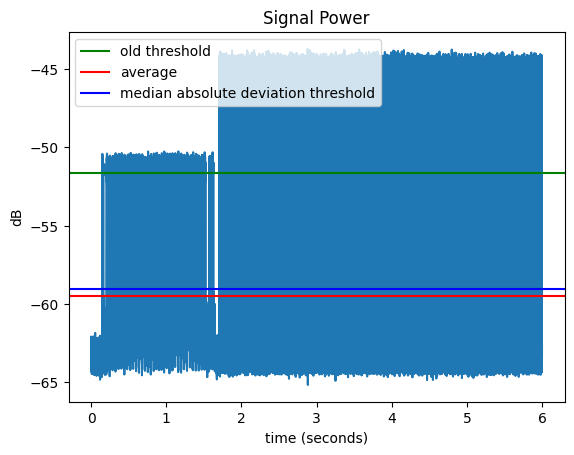


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:02<00:00, 62.17s/it]

Writing 1819 annotations to data/gamutrf/gamutrf-wifi-and-anom-bladerf/wifi-encoding-1-sendsps-5000000.s16.zst.sigmf-meta


In [5]:
for label in s3_data:
    for data_glob in s3_data[label]:
        for f in tqdm(glob.glob(str(Path(data_glob)))):
            annotation_utils.annotate(f, label=label, avg_window_len=256, avg_duration=6, debug=True, min_bandwidth=4e6)